# House Prices

Predict sales prices and practice feature engineering, Random Forests, and gradient boosting. 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Kaggle Profile: https://www.kaggle.com/remyflatt

Achieves: A score of 

References:
* https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

* https://www.tensorflow.org/decision_forests

* https://www.tensorflow.org/decision_forests/tutorials/automatic_tuning_colab
* https://www.kaggle.com/code/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda/report

# Import Helper Functions

In [ ]:
# Import helper functions from my github
!wget https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py

from helper_functions import plot_loss_curves, save_model_to_drive

--2023-03-10 01:54:35--  https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029 (1.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   1.00K  --.-KB/s    in 0s      

2023-03-10 01:54:35 (22.4 MB/s) - ‘helper_functions.py’ saved [1029/1029]



# Import Libraries

In [ ]:
# Install Tensorflow Decision Foresets
!pip install tensorflow tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from sklearn.preprocessing import StandardScaler

tf.random.set_seed(42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 39.2 MB/s eta 0:00:00


# Load Data

In [ ]:
DIR_PATH   = "/content/drive/MyDrive/Kaggle/house-prices"
TRAIN_PATH = DIR_PATH + "/" + "train.csv"
TEST_PATH  = DIR_PATH + "/" + "test.csv"

In [ ]:
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

# Exploratory data analysis

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
len(test_df)

1459

There are 1460 rows and 81 columns in the training data set. The Test dataset has 1459 rows.

In [ ]:
def na_values_table_for_dataframe(df, count=20):
  """
  For the dataframe output the top {count} values of features with NA values
  """
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  return missing_data.head(count)



In [ ]:
na_values_table_for_dataframe(train_df)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
na_values_table_for_dataframe(test_df)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


Taking a look at the columns as described in `data_description.txt` and their values it looks like most of them we can replace NA values with `NA` as it represents the option for no having the feature.

**PoolQC** - "Pool Quality" we can replace NA values with `NA` for `No pool`

**MiscFeature** - "Miscellaneous feature not covered in other categories", we can replace NA values with `NA` for `None`

**Alley** - "Type of alley access", we can replace NA values with `NA` for "No alley access".

**Fence** - "Fence quality", we can replace NA values with `NA` for "No Fence"

**FireplaceQu** - "Fireplace Quality", we can replace NA values with `NA` for `No Fireplace`

**LotFrontage** - "Linear feet of street connected to property", we can replace `NA` values with 0.

**GarageYrBlt** - "Year garage was built", will leave as NA.

**GarageCond** - "Garage Condition", we can replace NA values with `NA` for "No Garage".

**GarageType** - "Garage location", we can replace NA values with `NA` for "No Garage".

**GarageFinish** - "Interior finish of the garage", we can replace NA values with `NA` for "No Garage".

**GarageQual** - "Garage Quality", we can replace NA values with `NA` for "No Garage".

**BsmtFinType2** - "Quality of second finished area (if present)", we can replace NA values with `NA` for "No Basement".

**BsmtExposure** - "Walkout or garden level basement walls", we can replace NA values with `NA` for "No Basement".

**BsmtQual** - "Evaluates the height of the basement", we can replace NA values with `NA` for "No Basement".

**BsmtCond** - "Evaluates the general condition of the basement", we can replace NA values with `NA` for "No Basement".

**BsmtFinType1** - "Rating of basement finished area", we can replace NA values with `NA` for "No Basement".

**MasVnrArea** - "Masonry veneer area in square feet", we can replace NA values with 0.

**MasVnrType** - "Masonry veneer type", we can replace NA values with `None` for "None".

**BsmtHalfBath** - "Basement half bathrooms", we can replace NA values with `0`

**Functional** - "Home functionality (Assume typical unless deductions are warranted)", we can replace NA values with `Typ`

**BsmtFullBath** - "Basement full bathrooms", we can replace NA values with `0`

**GarageCars** - "Size of garage in car capacity", we can replace NA values with `0`

**GarageArea** - "Size of garage in square feet", we can replace NA values with `0`

**TotalBsmtSF** - "Total square feet of basement area", we can replace NA values with `0`

**BsmtUnfSF** - "Unfinished square feet of basement area", we can replace NA values with `0`

**BsmtFinSF2** - "Type 2 finished square feet", we can replace NA values with `0`
 
**BsmtFinSF1** - "Type 1 finished square feet", we can replace NA values with `0`

**KitchenQual** - "Kitchen quality", we can replace NA values with `TA` for "Typical/Average"

**MSZoning** - "MSZoning", We'll replace NA values with the most common value.

**Utilities** - "Type of utilities available", with the most common value.

**Exterior2nd** - "Exterior covering on house (if more than one material)", We'll replace NA values with the most common value.

**Exterior1st** - "Exterior covering on house", we'll replace NA values with the most common value.

**SaleType** - "Type of sale", we'll replace NA values with the most common value.



Looking at the data description file we can also see that some numerical features are categorical, which we can replace.

MSSubClass: Identifies the type of dwelling involved in the sale.	We can create our own mapping for the values here
MoSold: Month Sold (MM) - we can map each month to its integer value


In [ ]:
# get correlation of columns
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


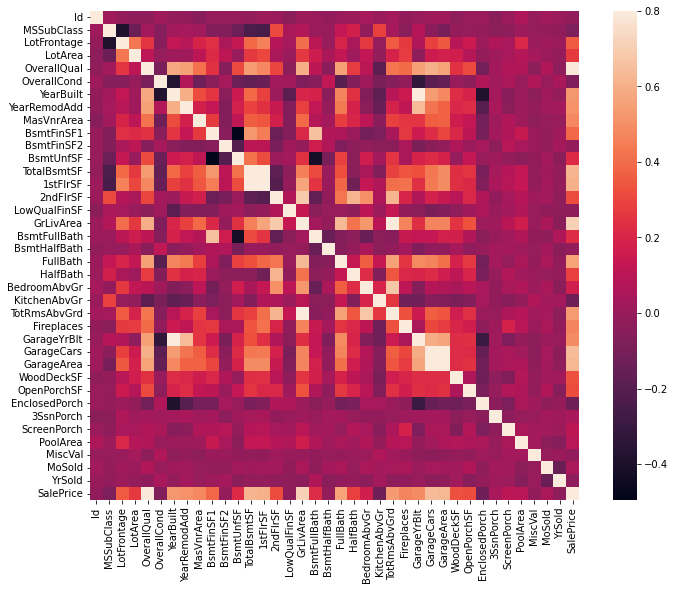

In [ ]:
# correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

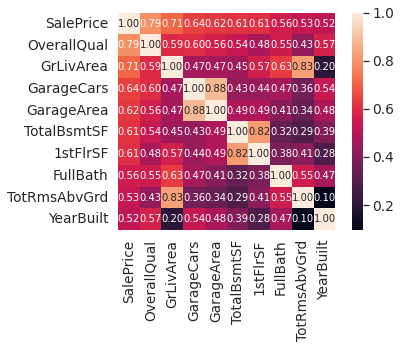

In [ ]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# SalePrice statistics summary
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


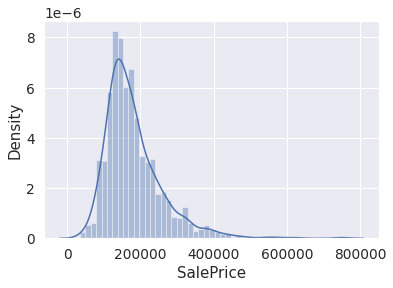

In [ ]:
sns.distplot(train_df.SalePrice);

In [ ]:
# skewness and kurtosis
print(f"Skewness: {train_df.SalePrice.skew()}")
print(f"Kurtosis: {train_df.SalePrice.kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


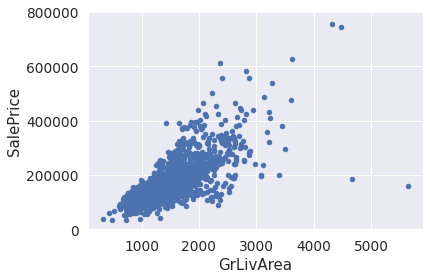

In [ ]:
# scatter plot grlivarea/saleprice
# GrLivArea: Above grade (ground) living area square feet

data = pd.concat([train_df.SalePrice, train_df.GrLivArea], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

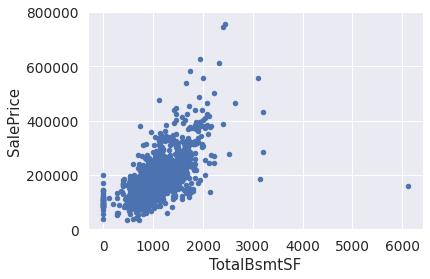

In [ ]:
# scatter plot TotalBsmtSF/saleprice
# TotalBsmtSF: Total square feet of basement area

data = pd.concat([train_df.SalePrice, train_df.TotalBsmtSF], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

# Relationship with categorical features

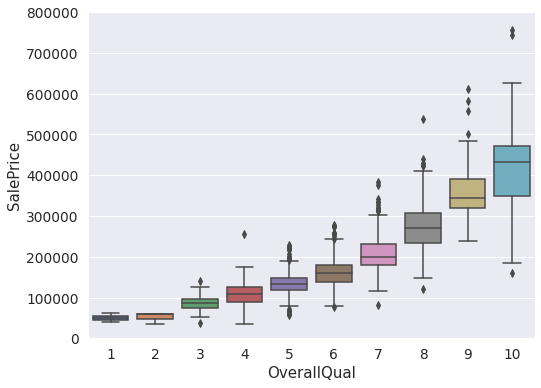

In [ ]:
# OverallQual: Overall material and finish quality

data = pd.concat([train_df['SalePrice'], train_df.OverallQual], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

This indicates that the better the overall quality of a house the better the sale price.

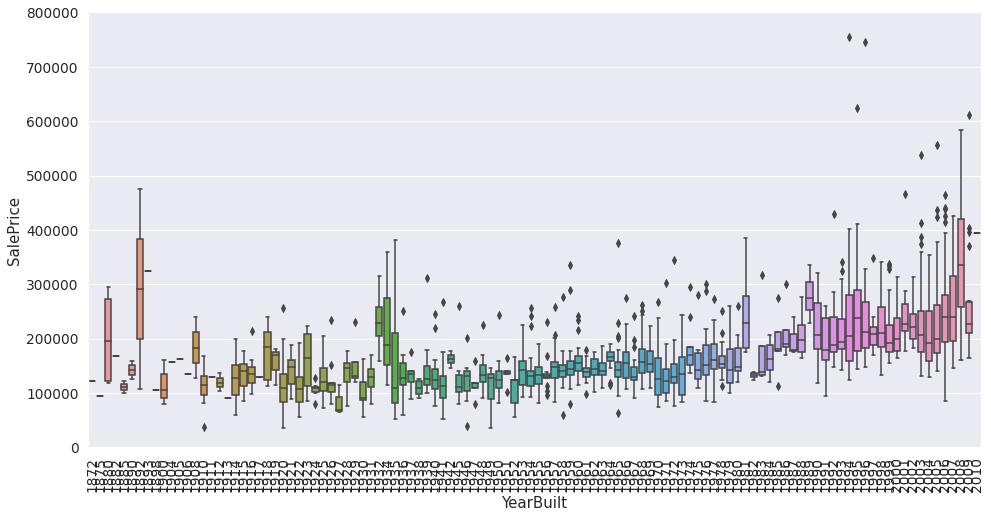

In [ ]:
# YearBuilt: Original construction date

data = pd.concat([train_df.SalePrice, train_df.YearBuilt], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

There looks like there is some relationship between YearBuilt and SalePrice

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


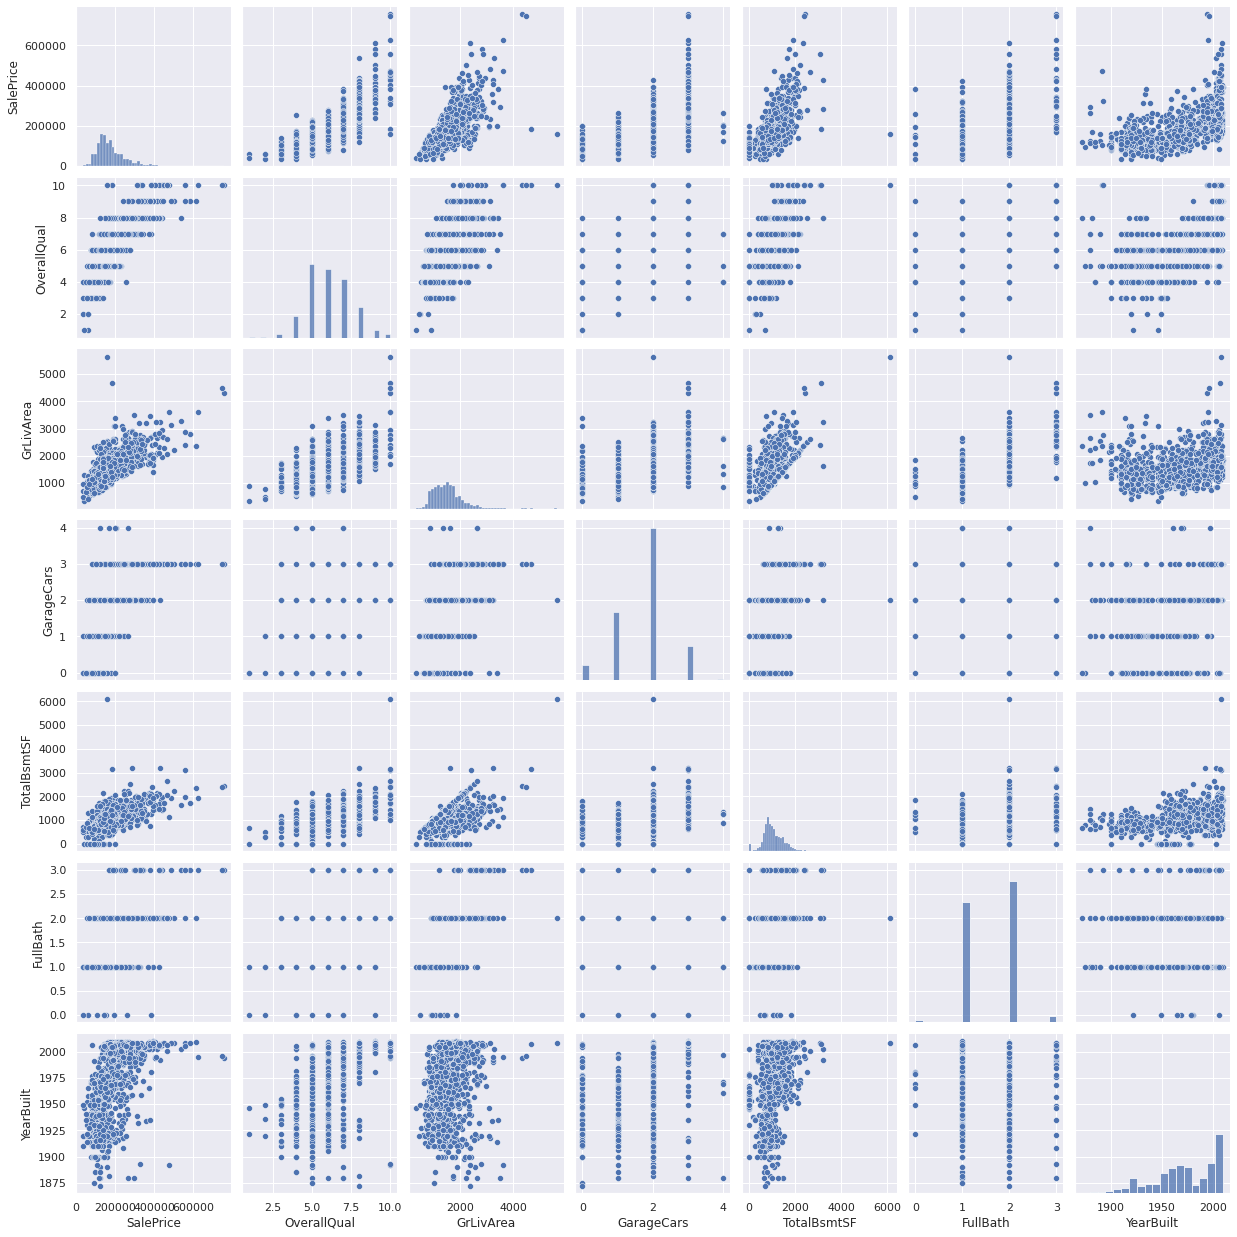

In [ ]:
# Scatter plots between 'SalePrice' and correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

# Feature Engineering

In [ ]:
# Store the label 
sale_prices = train_df.SalePrice

## Imputing missing data

We'll replace missing values as discussed earlier

In [ ]:
def replace_na_values(df):
  na_categorical_features = [
    "PoolQC", 
    "MiscFeature", 
    "Alley", 
    "Fence", 
    "FireplaceQu", 
    "GarageCond", 
    "GarageType", 
    "GarageFinish", 
    "GarageQual",
    "GarageQual", 
    "BsmtFinType2", 
    "BsmtExposure", 
    "BsmtQual", 
    "BsmtCond",
    "BsmtFinType1", 
    "MasVnrType"
  ] 

  na_numerical_features = [
    "MasVnrArea", 
    "LotFrontage",
    "BsmtHalfBath",
    "BsmtFullBath",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "BsmtUnfSF", 
    "BsmtFinSF2", 
    "BsmtFinSF1"
  ]


  for f in na_categorical_features: 
    df.loc[:, f] = df.loc[:, f].fillna("NA")

  for f in na_numerical_features:
    df.loc[:, f] = df.loc[:, f].fillna(0)


  df.loc[:, "Functional"]  = df.loc[:, "Functional"].fillna("Typ")
  df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("Typ")
  df.loc[:, 'Electrical']  = df.loc[:, 'Electrical'].fillna('SBrkr')

In [ ]:
replace_na_values(train_df)
replace_na_values(test_df)

In [ ]:
# Replace NA values in these columns with the mode value
print(train_df.MSZoning.mode(), test_df.MSZoning.mode())
print(train_df.Utilities.mode(), test_df.Utilities.mode())
print(train_df.Exterior1st.mode(), test_df.Exterior1st.mode())
print(train_df.Exterior2nd.mode(), test_df.Exterior2nd.mode())
print(train_df.SaleType.mode(), test_df.SaleType.mode())

0    RL
dtype: object 0    RL
dtype: object
0    AllPub
dtype: object 0    AllPub
dtype: object
0    VinylSd
dtype: object 0    VinylSd
dtype: object
0    VinylSd
dtype: object 0    VinylSd
dtype: object
0    WD
dtype: object 0    WD
dtype: object


In [ ]:
# Both data sets have the same mode values for these features

train_df.loc[:, 'MSZoning'].fillna('RL', inplace=True)
test_df.loc[:, 'MSZoning'].fillna('RL', inplace=True)

train_df.loc[:, 'Utilities'].fillna('AllPub', inplace=True)
test_df.loc[:, 'Utilities'].fillna('AllPub', inplace=True)

train_df.loc[:, 'Exterior1st'].fillna('VinylSd', inplace=True)
test_df.loc[:, 'Exterior1st'].fillna('VinylSd', inplace=True)

train_df.loc[:, 'Exterior2nd'].fillna('VinylSd', inplace=True)
test_df.loc[:, 'Exterior2nd'].fillna('VinylSd', inplace=True)

train_df.loc[:, 'SaleType'].fillna('WD', inplace=True)
test_df.loc[:, 'SaleType'].fillna('WD', inplace=True)


In [ ]:
# TODO Missing data in test
na_values_table_for_dataframe(train_df)

,Total,Percent
GarageYrBlt,81,0.055479
Id,0,0.000000
CentralAir,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


## Update numerical features to categorical

Looking at the data description file we can also see that some numerical features are categorical, which we can replace.

MSSubClass: Identifies the type of dwelling involved in the sale. We can create our own mapping for the values here 

MoSold: Month Sold (MM) - we can map each month to its integer value

In [ ]:
# Some numerical features are actually really categories
def update_subclass_and_month_sold(df):
  """
  Replace integer values for MSSubClass and MoSold with categorical values
  """
  df = df.replace({
    "MSSubClass" : { 
        20 : "SC20", 
        30 : "SC30", 
        40 : "SC40", 
        45 : "SC45", 
        50 : "SC50", 
        60 : "SC60", 
        70 : "SC70", 
        75 : "SC75", 
        80 : "SC80", 
        85 : "SC85", 
        90 : "SC90", 
        120 : "SC120", 
        150 : "SC150", 
        160 : "SC160", 
        180 : "SC180", 
        190 : "SC190"
    }
  })

  df = df.replace({
    "MoSold" : { 
      1 : "January", 
      2 : "February", 
      3 : "March", 
      4 : "April", 
      5 : "May", 
      6 : "June",
      7 : "July", 
      8 : "August", 
      9 : "September", 
      10 : "October", 
      11 : "November", 
      12 : "December"
    }
  })

In [ ]:
update_subclass_and_month_sold(train_df)
update_subclass_and_month_sold(test_df)

## Scale Numerical features

In [ ]:
train_ids = train_df.Id
test_ids = test_df.Id

numerical_features = train_df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice", "Id")
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

train_df.loc[:, numerical_features] = scaler.fit_transform(train_df.loc[:, numerical_features])
test_df.loc[:, numerical_features] = scaler.transform(test_df.loc[:, numerical_features])

## Cast numerical values to float32

In [ ]:
train_df.loc[:, numerical_features] = train_df.loc[:, numerical_features].astype('float32')
test_df.loc[:, numerical_features] = test_df.loc[:, numerical_features].astype('float32')

In [ ]:
train_df.dtypes

Id               float32
MSSubClass       float32
MSZoning          object
LotFrontage      float32
LotArea          float32
                  ...   
MoSold           float32
YrSold           float32
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Outliers

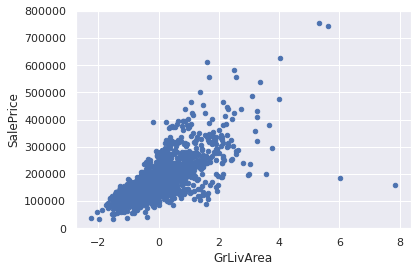

In [ ]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There are two houses with a Living area over 4000, we can remove them from the dataset. Also note that the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.

Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf



In [ ]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1.348865,0.073375,RL,7.369662,5.348867,Pave,NA,IR3,Bnk,AllPub,...,11.882444,Gd,NA,NA,-0.087688,-1.969111,0.138777,New,Partial,160000
523,-0.489957,0.073375,RL,2.088647,2.964284,Pave,NA,IR1,Bnk,AllPub,...,-0.068692,NA,NA,NA,-0.087688,1.360892,-0.614439,New,Partial,184750


In [ ]:
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

## Remove Id column

In [ ]:
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [ ]:
train_df.isna().value_counts

<bound method DataFrame.value_counts of       MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          False     False        False    False   False  False     False   
1          False     False        False    False   False  False     False   
2          False     False        False    False   False  False     False   
3          False     False        False    False   False  False     False   
4          False     False        False    False   False  False     False   
...          ...       ...          ...      ...     ...    ...       ...   
1455       False     False        False    False   False  False     False   
1456       False     False        False    False   False  False     False   
1457       False     False        False    False   False  False     False   
1458       False     False        False    False   False  False     False   
1459       False     False        False    False   False  False     False   

      LandContour  Utilities  LotCo

## Ordinal Encoding 

Some of the features are ordinal data in that they are ranked.

For example ExterQual:
* Ex	Excellent
* Gd	Good
* TA	Average/Typical
* Fa	Fair
* Po	Poor

We can use Ordinal encoding for these values:
* ExterQual
* ExterCond
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* HeatingQC
* KitchenQual
* Functional
* FireplaceQu
* GarageFinish
* GarageQual
* GarageCond
* PoolQC

In [ ]:
oridnal_features = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC"
]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
train_df[oridnal_features] = enc.fit_transform(train_df[oridnal_features])
train_df

test_df[oridnal_features] = enc.fit_transform(test_df[oridnal_features])
test_df



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.872563,RH,0.645747,0.110763,Pave,NA,Reg,Lvl,AllPub,Inside,...,1.882709,-0.068692,2.0,MnPrv,NA,-0.087688,-0.119110,1.645210,WD,Normal
1,-0.872563,RL,0.674605,0.375850,Pave,NA,IR1,Lvl,AllPub,Corner,...,-0.270208,-0.068692,2.0,NA,Gar2,25.116308,-0.119110,1.645210,WD,Normal
2,0.073375,RL,0.472599,0.332053,Pave,NA,IR1,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,MnPrv,NA,-0.087688,-1.229111,1.645210,WD,Normal
3,0.073375,RL,0.588031,-0.054002,Pave,NA,IR1,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,NA,NA,-0.087688,-0.119110,1.645210,WD,Normal
4,1.492282,RL,-0.421999,-0.552407,Pave,NA,IR1,HLS,AllPub,Inside,...,2.313293,-0.068692,2.0,NA,NA,-0.087688,-1.969111,1.645210,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,RM,-1.056875,-0.859988,Pave,NA,Reg,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,NA,NA,-0.087688,-0.119110,-1.367655,WD,Normal
1455,2.438219,RM,-1.056875,-0.864197,Pave,NA,Reg,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,NA,NA,-0.087688,-0.859110,-1.367655,WD,Abnorml
1456,-0.872563,RL,2.954388,0.950423,Pave,NA,Reg,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,NA,NA,-0.087688,0.990891,-1.367655,WD,Abnorml
1457,0.664586,RL,0.126303,-0.007600,Pave,NA,Reg,Lvl,AllPub,Inside,...,-0.270208,-0.068692,2.0,MnPrv,Shed,1.323736,0.250891,-1.367655,WD,Normal


# Label Encode categorical data


In [ ]:
categorical_features = train_df.select_dtypes(include = ["object"]).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
train_df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,CBlock,GasA,Y,SBrkr,Attchd,Y,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,BrkTil,GasA,Y,SBrkr,Detchd,Y,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,NA,NA,WD,Normal
1456,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,CBlock,GasA,Y,SBrkr,Attchd,Y,MnPrv,NA,WD,Normal
1457,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Stone,GasA,Y,SBrkr,Attchd,Y,GdPrv,Shed,WD,Normal
1458,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,CBlock,GasA,Y,FuseA,Attchd,Y,NA,NA,WD,Normal


In [ ]:
test_df.MSZoning.value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for feature in categorical_features:
  train_df[feature] = enc.fit_transform(train_df[feature])
  test_df[feature] = enc.fit_transform(test_df[feature])


# Create Datasets

In [ ]:
# TODO fix causing issues
train_df.drop('GarageYrBlt', axis = 1, inplace = True)
test_df.drop('GarageYrBlt', axis = 1, inplace = True)

In [ ]:
train_df = train_df.astype('float32')
test_df = test_df.astype('float32')

In [ ]:
# Drop sale price
train_df.drop('SalePrice', axis=1, inplace=True)

# Basic Sequential Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    sale_prices, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,-0.872563,3.0,0.357167,-0.212153,1.0,1.0,3.0,3.0,0.0,4.0,...,-0.270208,-0.068692,3.0,4.0,1.0,-0.087688,-0.11911,1.645210,8.0,4.0
1066,0.073375,3.0,0.039729,-0.268578,1.0,1.0,0.0,3.0,0.0,4.0,...,-0.270208,-0.068692,3.0,4.0,1.0,-0.087688,-0.48911,0.891994,8.0,4.0
638,-0.636078,3.0,0.270593,-0.174369,1.0,1.0,3.0,3.0,0.0,4.0,...,-0.270208,-0.068692,3.0,2.0,1.0,-0.087688,-0.48911,0.138777,8.0,4.0
799,-0.163109,3.0,0.068587,-0.332419,1.0,1.0,3.0,3.0,0.0,0.0,...,-0.270208,-0.068692,3.0,2.0,1.0,-0.087688,-0.11911,-0.614439,8.0,4.0
380,-0.163109,3.0,-0.219993,-0.552908,1.0,2.0,3.0,3.0,0.0,4.0,...,-0.270208,-0.068692,3.0,4.0,1.0,-0.087688,-0.48911,1.645210,8.0,4.0


In [ ]:
baseline_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, name="output")
])

baseline_model.compile(
  loss=tf.keras.losses.mae, 
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["mae", "mse"]
)

baseline_model.fit(
  X_train,
  y_train,
  epochs=100
)

Epoch 1/100
37/37 [==============================] - 4s 9ms/step - loss: 181377.4531 - mae: 181377.4531 - mse: 38861791232.0000
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 181095.1094 - mae: 181095.1094 - mse: 38759268352.0000
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 180313.2812 - mae: 180313.2812 - mse: 38476910592.0000
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 178663.3750 - mae: 178663.3750 - mse: 37888843776.0000
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 175778.7031 - mae: 175778.7031 - mse: 36862185472.0000
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 171276.7969 - mae: 171276.7969 - mse: 35305263104.0000
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 164805.6250 - mae: 164805.6250 - mse: 33151864832.0000
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 156004.1719 - mae: 156004.1719 

In [ ]:
baseline_model.evaluate(X_test, y_test)


10/10 [==============================] - 0s 2ms/step - loss: 23355.9570 - mae: 23355.9570 - mse: 1704669952.0000


[23355.95703125, 23355.95703125, 1704669952.0]

### Create Predictions


In [ ]:
baseline_preds = baseline_model.predict(test_df)
baseline_preds = tf.squeeze(baseline_preds)

46/46 [==============================] - 0s 2ms/step


### Create Kaggle Submission

In [ ]:
baseline_submission_df = pd.DataFrame({ "Id": test_ids, "SalePrice": baseline_preds })
baseline_submission_df.to_csv("/content/drive/MyDrive/Kaggle/house-prices/baseline-submission.csv", index = False)

Submitting the predictions to kaggle it got a score of 0.38468.

# Tensorflow Decision Forests

Next we'll build a Random Forest and Gradient Boosted Models and see how they perform.

We'll run the models without an automated tuner then based on results run the model with the best defaults with an automated tuner.

## Convert Dataframes to Datasets

Because we removed the sale_prices when building the split earlier we can add them back to the dataset before converting them to a dataset

In [ ]:
train_df['SalePrice'] = sale_prices

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="SalePrice", task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task = tfdf.keras.Task.REGRESSION )

## Random Forest Model

Use the Random Forest learning algorithm and see how it performs.

https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel

In [ ]:
random_forest_model = tfdf.keras.RandomForestModel(  
  task = tfdf.keras.Task.REGRESSION, 
  verbose=2,
)

Use 2 thread(s) for training
Use /tmp/tmpyjfr5t2d as temporary training directory


In [ ]:
random_forest_model.fit(
  train_ds,
)

Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data_51:0' shape=(None,) dtype=float32>, 'MSZoning': <tf.Tensor 'data_52:0' shape=(None,) dtype=float32>, 'LotFrontage': <tf.Tensor 'data_48:0' shape=(None,) dtype=float32>, 'LotArea': <tf.Tensor 'data_46:0' shape=(None,) dtype=float32>, 'Street': <tf.Tensor 'data_70:0' shape=(None,) dtype=float32>, 'Alley': <tf.Tensor 'data_3:0' shape=(None,) dtype=float32>, 'LotShape': <tf.Tensor 'data_49:0' shape=(None,) dtype=float32>, 'LandContour': <tf.Tensor 'data_44:0' shape=(None,) dtype=float32>, 'Utilities': <tf.Tensor 'data_73:0' shape=(None,) dtype=float32>, 'LotConfig': <tf.Tensor 'data_47:0' shape=(None,) dtype=float32>, 'LandSlope': <tf.Tensor 'data_45:0' shape=(None,) dtype=float32>, 'Neighborhood': <tf.Tensor 'data_58:0' shape=(None,) dtype=float32>, 'Condition1': <tf.Tensor 'data_17:0' shape=(None,) dtype=float32>, 'Condition2': <tf.Tensor 'data_18:0' shape=(None,) dtype=float32>, 'BldgType': <

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'MSSubClass': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_51:0' shape=(None,) dtype=float32>), 'MSZoning': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_52:0' shape=(None,) dtype=float32>), 'LotFrontage': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_48:0' shape=(None,) dtype=float32>), 'LotArea': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_46:0' shape=(None,) dtype=float32>), 'Street': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_70:0' shape=(None,) dtype=float32>), 'Alley': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=float32>), 'LotShape': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_49:0' shape=(None,) dtype=float32>), 'LandContour': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'data_44:0' shape=(None,) dtype=floa

[INFO 2023-03-10T01:56:00.949337127+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-03-10T01:56:00.949484572+00:00 kernel.cc:757] Collect training examples
[INFO 2023-03-10T01:56:00.949969109+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-03-10T01:56:00.94999269+00:00 kernel.cc:389] Number of examples: 1460
[INFO 2023-03-10T01:56:00.952458903+00:00 kernel.cc:774] Training dataset:
Number of records: 1460
Number of columns: 79

Number of columns by type:
	NUMERICAL: 79 (100%)

Columns:

NUMERICAL: 79 (100%)
	0: "1stFlrSF" NUMERICAL mean:-1.08466e-09 min:-2.14417 max:9.13268 sd:1
	1: "2ndFlrSF" NUMERICAL mean:7.36175e-09 min:-0.795163 max:3.93696 sd:1
	2: "3SsnPorch" NUMERICAL mean:-2.06167e-09 min:-0.116339 max:17.2172 sd:1
	3: "Alley" NUMERICAL mean:0.993836 min:0 max:2 sd:0.249581
	4: "BedroomAbvGr" NUMERICAL mean:7.75677e-09 min:-3.51495 max:6.295 sd:1
	5: "BldgType" NUMERICAL mean:0.493151 min:0 max:4 sd:1.19787
	6: "BsmtCond" NUMERICAL mean:3.6911 min:0 max:4 s

Model trained in 0:00:05.377569
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


### Create Predictions

In [ ]:
random_forest_preds = random_forest_model.predict(test_ds)
random_forest_preds = tf.squeeze(random_forest_preds)

2/2 [==============================] - 0s 25ms/step


### Create Kaggle Submission

In [ ]:
random_forest_submission_df = pd.DataFrame({ "Id": test_ids, "SalePrice": random_forest_preds })
random_forest_submission_df.to_csv("/content/drive/MyDrive/Kaggle/house-prices/random-forest-submission.csv", index = False)

Submitting the predictions to kaggle it got a score of 0.14636, which is a 62% improvement over the baseline model.

## Cart Model

Use the Cart learning algorithm and see how it performs 

https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/CartModel

In [ ]:
cart_model = tfdf.keras.CartModel(  
  task = tfdf.keras.Task.REGRESSION, 
  verbose=2,
)

Use 2 thread(s) for training
Use /tmp/tmpkx8oy42g as temporary training directory


In [ ]:
cart_model.fit(
  train_ds,
)

Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data_51:0' shape=(None,) dtype=float32>, 'MSZoning': <tf.Tensor 'data_52:0' shape=(None,) dtype=float32>, 'LotFrontage': <tf.Tensor 'data_48:0' shape=(None,) dtype=float32>, 'LotArea': <tf.Tensor 'data_46:0' shape=(None,) dtype=float32>, 'Street': <tf.Tensor 'data_70:0' shape=(None,) dtype=float32>, 'Alley': <tf.Tensor 'data_3:0' shape=(None,) dtype=float32>, 'LotShape': <tf.Tensor 'data_49:0' shape=(None,) dtype=float32>, 'LandContour': <tf.Tensor 'data_44:0' shape=(None,) dtype=float32>, 'Utilities': <tf.Tensor 'data_73:0' shape=(None,) dtype=float32>, 'LotConfig': <tf.Tensor 'data_47:0' shape=(None,) dtype=float32>, 'LandSlope': <tf.Tensor 'data_45:0' shape=(None,) dtype=float32>, 'Neighborhood': <tf.Tensor 'data_58:0' shape=(None,) dtype=float32>, 'Condition1': <tf.Tensor 'data_17:0' shape=(None,) dtype=float32>, 'Condition2': <tf.Tensor 'data_18:0' shape=(None,) dtype=float32>, 'BldgType': <

[INFO 2023-03-10T01:56:13.178375296+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-03-10T01:56:13.178406166+00:00 kernel.cc:757] Collect training examples
[INFO 2023-03-10T01:56:13.178878513+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-03-10T01:56:13.17890547+00:00 kernel.cc:389] Number of examples: 1460
[INFO 2023-03-10T01:56:13.181281658+00:00 kernel.cc:774] Training dataset:
Number of records: 1460
Number of columns: 79

Number of columns by type:
	NUMERICAL: 79 (100%)

Columns:

NUMERICAL: 79 (100%)
	0: "1stFlrSF" NUMERICAL mean:-1.08466e-09 min:-2.14417 max:9.13268 sd:1
	1: "2ndFlrSF" NUMERICAL mean:7.36175e-09 min:-0.795163 max:3.93696 sd:1
	2: "3SsnPorch" NUMERICAL mean:-2.06167e-09 min:-0.116339 max:17.2172 sd:1
	3: "Alley" NUMERICAL mean:0.993836 min:0 max:2 sd:0.249581
	4: "BedroomAbvGr" NUMERICAL mean:7.75677e-09 min:-3.51495 max:6.295 sd:1
	5: "BldgType" NUMERICAL mean:0.493151 min:0 max:4 sd:1.19787
	6: "BsmtCond" NUMERICAL mean:3.6911 min:0 max:4 s

Model trained in 0:00:00.080253
Compiling model...
Model compiled.


### Create Predictions

In [ ]:
cart_preds = cart_model.predict(test_ds)
cart_preds = tf.squeeze(cart_preds)

2/2 [==============================] - 0s 46ms/step


### Create Kaggle Submission

In [ ]:
cart_submission_df = pd.DataFrame({ "Id": test_ids, "SalePrice": cart_preds })
cart_submission_df.to_csv("/content/drive/MyDrive/Kaggle/house-prices/cart-submission.csv", index = False)

Submitting the predictions to kaggle it got a score of  0.20902, which is a 45% improvement over the baseline model.


## Gradient Boosted Trees Model

Use the Gradient Boosted Trees learning algorithm and see how it performs 

https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel

In [ ]:
gradient_boosted_model = tfdf.keras.GradientBoostedTreesModel(
  task = tfdf.keras.Task.REGRESSION, 
  verbose=2,
)

Use 2 thread(s) for training
Use /tmp/tmp71609zpj as temporary training directory


In [ ]:
gradient_boosted_model.fit(
  train_ds,
)

Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data_51:0' shape=(None,) dtype=float32>, 'MSZoning': <tf.Tensor 'data_52:0' shape=(None,) dtype=float32>, 'LotFrontage': <tf.Tensor 'data_48:0' shape=(None,) dtype=float32>, 'LotArea': <tf.Tensor 'data_46:0' shape=(None,) dtype=float32>, 'Street': <tf.Tensor 'data_70:0' shape=(None,) dtype=float32>, 'Alley': <tf.Tensor 'data_3:0' shape=(None,) dtype=float32>, 'LotShape': <tf.Tensor 'data_49:0' shape=(None,) dtype=float32>, 'LandContour': <tf.Tensor 'data_44:0' shape=(None,) dtype=float32>, 'Utilities': <tf.Tensor 'data_73:0' shape=(None,) dtype=float32>, 'LotConfig': <tf.Tensor 'data_47:0' shape=(None,) dtype=float32>, 'LandSlope': <tf.Tensor 'data_45:0' shape=(None,) dtype=float32>, 'Neighborhood': <tf.Tensor 'data_58:0' shape=(None,) dtype=float32>, 'Condition1': <tf.Tensor 'data_17:0' shape=(None,) dtype=float32>, 'Condition2': <tf.Tensor 'data_18:0' shape=(None,) dtype=float32>, 'BldgType': <

[INFO 2023-03-10T01:56:15.474227682+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-03-10T01:56:15.474251615+00:00 kernel.cc:757] Collect training examples
[INFO 2023-03-10T01:56:15.474504298+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-03-10T01:56:15.474513463+00:00 kernel.cc:389] Number of examples: 1460
[INFO 2023-03-10T01:56:15.476851078+00:00 kernel.cc:774] Training dataset:
Number of records: 1460
Number of columns: 79

Number of columns by type:
	NUMERICAL: 79 (100%)

Columns:

NUMERICAL: 79 (100%)
	0: "1stFlrSF" NUMERICAL mean:-1.08466e-09 min:-2.14417 max:9.13268 sd:1
	1: "2ndFlrSF" NUMERICAL mean:7.36175e-09 min:-0.795163 max:3.93696 sd:1
	2: "3SsnPorch" NUMERICAL mean:-2.06167e-09 min:-0.116339 max:17.2172 sd:1
	3: "Alley" NUMERICAL mean:0.993836 min:0 max:2 sd:0.249581
	4: "BedroomAbvGr" NUMERICAL mean:7.75677e-09 min:-3.51495 max:6.295 sd:1
	5: "BldgType" NUMERICAL mean:0.493151 min:0 max:4 sd:1.19787
	6: "BsmtCond" NUMERICAL mean:3.6911 min:0 max:4 

Model trained in 0:00:04.007232
Compiling model...


Model compiled.


### Create Predictions

In [ ]:
gradient_boosted_preds = gradient_boosted_model.predict(test_ds)
gradient_boosted_preds = tf.squeeze(gradient_boosted_preds)

2/2 [==============================] - 0s 62ms/step


### Create Kaggle Submission

In [ ]:
gradient_boosted_submission_df = pd.DataFrame({ "Id": test_ids, "SalePrice": gradient_boosted_preds })
gradient_boosted_submission_df.to_csv("/content/drive/MyDrive/Kaggle/house-prices/gradient-boosted-submission.csv", index = False)

Submitting the predictions to kaggle it got a score of  0.13659, which is a 64% improvement over the baseline model.

## Tuned Gradient Boosted Trees Model

The Gradient Boosted Trees model performed the best, so we'll use the automated tuner to find the optimal values.

In [ ]:
# This will take a long time to run
tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

tuned_gradient_boosted_model = tfdf.keras.GradientBoostedTreesModel(
  task = tfdf.keras.Task.REGRESSION, 
  verbose=2,
  tuner=tuner
)

Use 2 thread(s) for training
Use /tmp/tmp9_5o96m6 as temporary training directory


In [ ]:
tuned_gradient_boosted_model.fit(
  train_ds,
)

Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data_51:0' shape=(None,) dtype=float32>, 'MSZoning': <tf.Tensor 'data_52:0' shape=(None,) dtype=float32>, 'LotFrontage': <tf.Tensor 'data_48:0' shape=(None,) dtype=float32>, 'LotArea': <tf.Tensor 'data_46:0' shape=(None,) dtype=float32>, 'Street': <tf.Tensor 'data_70:0' shape=(None,) dtype=float32>, 'Alley': <tf.Tensor 'data_3:0' shape=(None,) dtype=float32>, 'LotShape': <tf.Tensor 'data_49:0' shape=(None,) dtype=float32>, 'LandContour': <tf.Tensor 'data_44:0' shape=(None,) dtype=float32>, 'Utilities': <tf.Tensor 'data_73:0' shape=(None,) dtype=float32>, 'LotConfig': <tf.Tensor 'data_47:0' shape=(None,) dtype=float32>, 'LandSlope': <tf.Tensor 'data_45:0' shape=(None,) dtype=float32>, 'Neighborhood': <tf.Tensor 'data_58:0' shape=(None,) dtype=float32>, 'Condition1': <tf.Tensor 'data_17:0' shape=(None,) dtype=float32>, 'Condition2': <tf.Tensor 'data_18:0' shape=(None,) dtype=float32>, 'BldgType': <

[INFO 2023-03-10T01:56:22.819832624+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-03-10T01:56:22.81986113+00:00 kernel.cc:757] Collect training examples
[INFO 2023-03-10T01:56:22.82025364+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-03-10T01:56:22.820273078+00:00 kernel.cc:389] Number of examples: 1460
[INFO 2023-03-10T01:56:22.822481629+00:00 kernel.cc:774] Training dataset:
Number of records: 1460
Number of columns: 79

Number of columns by type:
	NUMERICAL: 79 (100%)

Columns:

NUMERICAL: 79 (100%)
	0: "1stFlrSF" NUMERICAL mean:-1.08466e-09 min:-2.14417 max:9.13268 sd:1
	1: "2ndFlrSF" NUMERICAL mean:7.36175e-09 min:-0.795163 max:3.93696 sd:1
	2: "3SsnPorch" NUMERICAL mean:-2.06167e-09 min:-0.116339 max:17.2172 sd:1
	3: "Alley" NUMERICAL mean:0.993836 min:0 max:2 sd:0.249581
	4: "BedroomAbvGr" NUMERICAL mean:7.75677e-09 min:-3.51495 max:6.295 sd:1
	5: "BldgType" NUMERICAL mean:0.493151 min:0 max:4 sd:1.19787
	6: "BsmtCond" NUMERICAL mean:3.6911 min:0 max:4 sd

In [ ]:
tuned_gradient_tuning_logs = tuned_gradient_boosted_model.make_inspector().tuning_logs()
tuned_gradient_tuning_logs.head()

In [ ]:
tuned_gradient_tuning_logs[tuned_gradient_tuning_logs.best].iloc[0]

In [ ]:
# Finally, plots the evolution of the quality of the model during tuning:
plt.figure(figsize=(10, 5))
plt.plot(tuned_gradient_tuning_logs["score"], label="current trial")
plt.plot(tuned_gradient_tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

### Create Predictions

In [ ]:
tuned_gradient_boosted_preds = tuned_gradient_boosted_model.predict(test_ds)
tuned_gradient_boosted_preds = tf.squeeze(tuned_gradient_boosted_preds)

### Create Kaggle Submission

In [ ]:
tuned_gradient_boosted_submission_df = pd.DataFrame({ "Id": test_ids, "SalePrice": tuned_gradient_boosted_preds })
tuned_gradient_boosted_submission_df.to_csv("/content/drive/MyDrive/Kaggle/house-prices/tuned-gradient-boosted-submission.csv", index = False)

With the tuned Gradient Boosted model we were able to get a score of 0.13032, which is a 10% over the original Gradient Boosted model and a 70% increase over the baseline model